# Emotion-based movie recommendation

In [1]:
%matplotlib inline

In [2]:
from ScreenplayEmotions import MovieCollection, Lexicon
from MovieSets import sets

In [3]:
lex = Lexicon('NRC-EmoLex-v0.92.txt')

## First Principles

In [6]:
poem_metadata = "Do Not Grieve - Poem by Bernard Shaw"

gbs = """
Do not grieve when I pass away, 
Remember it is but another stop upon my way. 
On my way to a better existence. 
That has always beckoned me from a distance. 
It is a threshold that we all must cross, 
Know that my passing is not a loss. 
I will ascend to a temple of learning, 
That my soul has been forever yearning. 
Knowledge I will gain that man does not know, 
So do not grieve at this my funeral below. 
Be cheerful at my open grave this day, 
Send me off with good wishes that is all I pray.
"""

In [7]:
gbs_emotions = lex.emotions_with_decay(gbs, 12, 1,0)
gbs_emotions

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,0.000,0.000,0.0,0.125000,0.000,0.125000,0.000,0.125000,0.000,0.000
1,0.000,0.000,0.0,0.000000,0.000,0.000000,0.000,0.000000,0.000,0.000
2,0.000,0.000,0.0,0.000000,0.000,0.000000,0.125,0.000000,0.000,0.000
3,0.000,0.000,0.0,0.000000,0.000,0.000000,0.000,0.000000,0.000,0.000
4,0.125,0.000,0.0,0.125000,0.000,0.125000,0.000,0.125000,0.000,0.000
5,0.125,0.000,0.0,0.125000,0.000,0.125000,0.000,0.125000,0.000,0.000
6,0.000,0.000,0.0,0.000000,0.000,0.000000,0.125,0.000000,0.000,0.000
7,0.000,0.125,0.0,0.000000,0.125,0.125000,0.250,0.000000,0.000,0.125
8,0.000,0.125,0.0,0.000000,0.125,0.000000,0.125,0.000000,0.000,0.000
9,0.000,0.000,0.0,0.111111,0.000,0.111111,0.000,0.222222,0.000,0.000


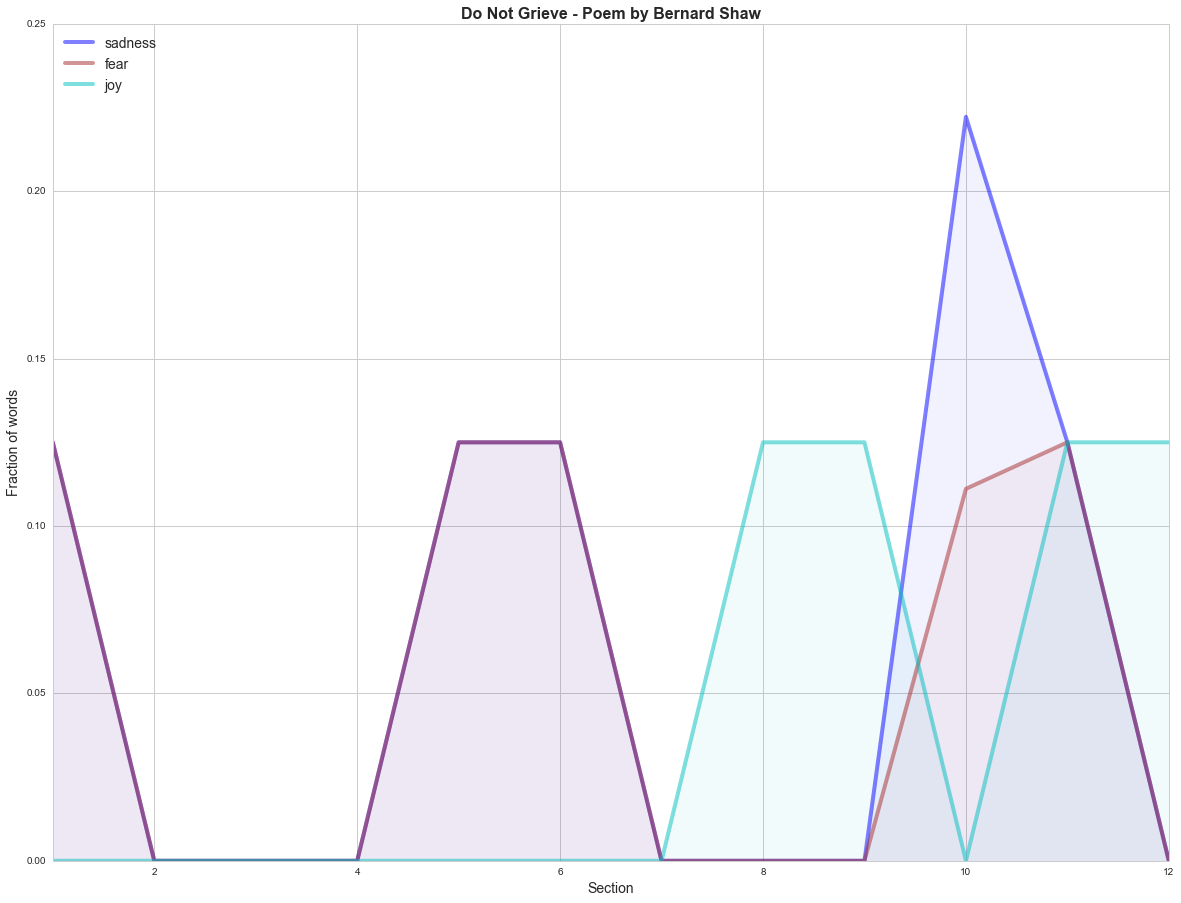

In [8]:
lex.plot_emotions(gbs_emotions, poem_metadata, include=[], exclude=['positive', 'negative'], top=3, fill=True)

## Generalization to screenplays

- Assume that sectioning the text enough times with a decaying emotional memory is equivalent to sectioning between actual scenes, also with a decaying emotional memory.
- Since the algorithm is very literal, it doesn't detect humor, nor does it readily weigh emotions with sentiments (e.g. Trust and Distrust are assumed to be the same), it's helpful to include weighted information about movie genres. The weight should be just enough so that recommendations are balanced between emotions and genres.

In [4]:
mc = MovieCollection(metadata_path='movie-data.txt', 
                     screenplay_dir='raw', 
                     lexicon_path='NRC-EmoLex-v0.92.txt')

Successfully loaded 1110 items. Failed to load 41 items.
Use read_emotions(N, M, D, G) to get started, load_emotions(config_file) if you have previous calculations or look at 'failed_titles' to troubleshoot.


In [5]:
mc.load_emotions()

Appending genres to emotions ...
Calculating distance matrix ...
Done.


### Discovering similar movies

In [13]:
mc.get_distance_to('Shrek')[:10]

Shrek                                                             0.000000
Marley & Me                                                       0.227480
Birthday Girl                                                     0.246025
Ted                                                               0.247377
I Am Number Four                                                  0.288053
Next Three Days, The                                              0.292508
Adventures of Buckaroo Banzai Across the Eighth Dimension, The    0.294312
Sex, Lies and Videotape                                           0.300191
Wonder Boys                                                       0.303666
Beavis and Butt-head Do America                                   0.304773
Name: Shrek, dtype: float64

In [17]:
mc.get_distance_to('Wolf of Wall Street, The')[:10]

Wolf of Wall Street, The      0.000000
Cedar Rapids                  0.136728
Mini's First Time             0.143216
Jerry Maguire                 0.149324
Barry Lyndon                  0.150222
Ed Wood                       0.150790
10 Things I Hate About You    0.151096
Analyze That                  0.151675
Year One                      0.157302
Do The Right Thing            0.157362
Name: Wolf of Wall Street, The, dtype: float64

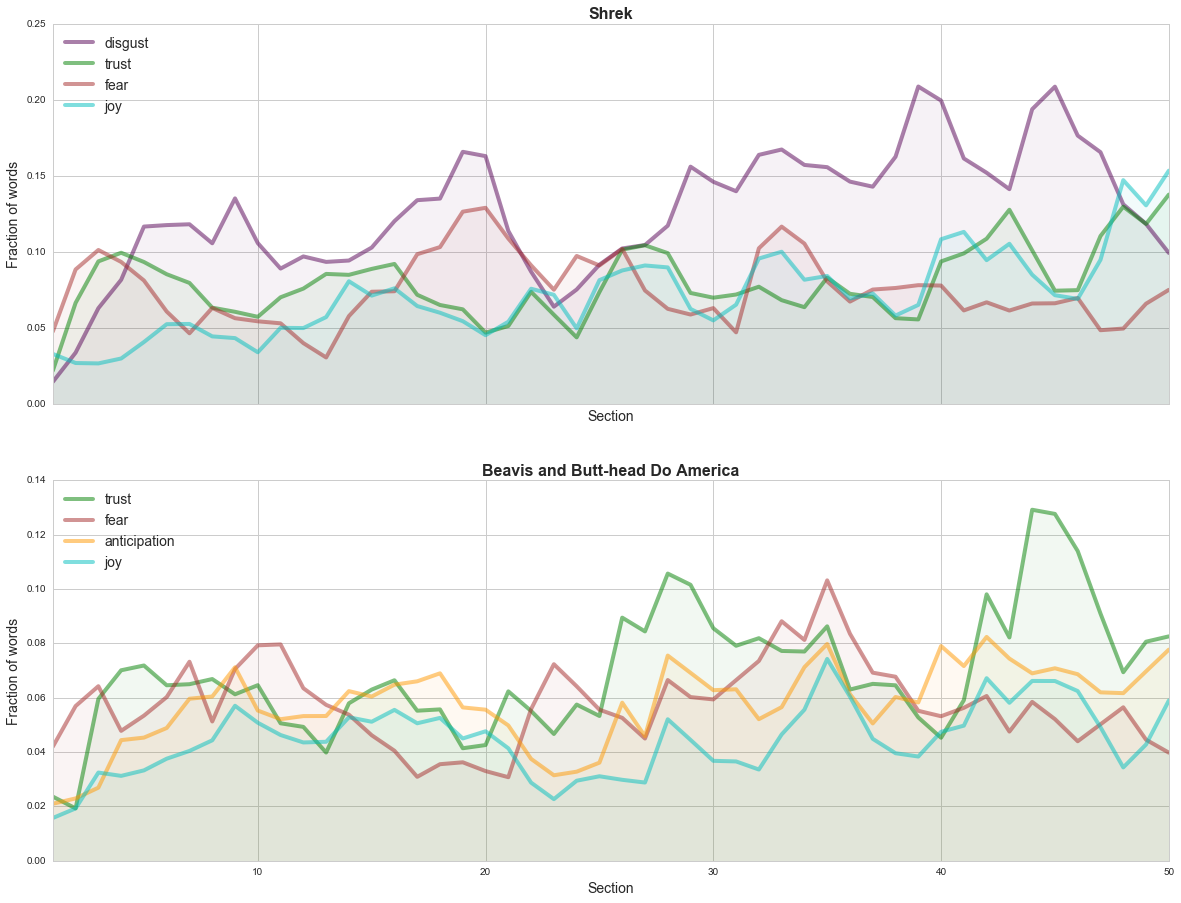

In [15]:
mc.emotions_plot(['Shrek', 'Beavis and Butt-head Do America'], top=4)

### Finding differences between movies

In [7]:
mc.get_distance_to('Star Wars: The Phantom Menace')

Star Wars: The Phantom Menace                    0.000000
Indiana Jones and the Raiders of the Lost Ark    0.148306
Highlander                                       0.158724
Independence Day                                 0.164194
Next                                             0.165256
Red Planet                                       0.169237
Star Wars: Attack of the Clones                  0.174612
Lord of the Rings: The Two Towers                0.178230
Oblivion                                         0.180980
TRON: Legacy                                     0.182125
Highlander: Endgame                              0.188329
Supergirl                                        0.191900
Postman, The                                     0.192436
Cliffhanger                                      0.196225
Star Wars: The Force Awakens                     0.196693
Hellboy 2: The Golden Army                       0.197975
Star Wars: Return of the Jedi                    0.198449
X-Men Origins:

In [17]:
mc.get_distance_to('Star Wars: A New Hope')[:10]

Star Wars: A New Hope                                             0.000000
Star Wars: Return of the Jedi                                     0.191364
Indiana Jones and the Raiders of the Lost Ark                     0.219160
Rambo: First Blood II: The Mission                                0.222076
Die Hard 2                                                        0.222750
Arcade                                                            0.223857
Next                                                              0.229900
Avatar                                                            0.237454
Hellraiser 3: Hell on Earth                                       0.237910
Adventures of Buckaroo Banzai Across the Eighth Dimension, The    0.240965
Name: Star Wars: A New Hope, dtype: float64

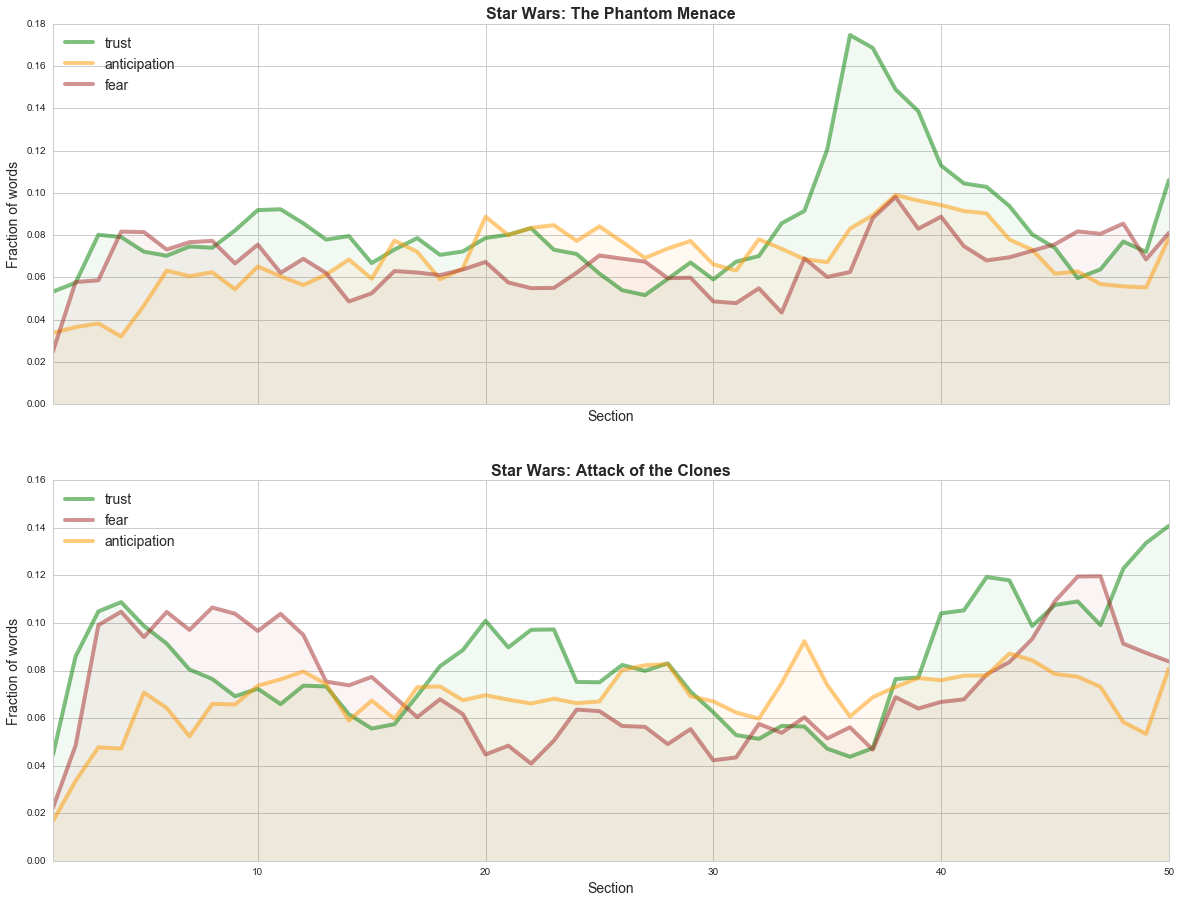

In [22]:
mc.emotions_plot(['Star Wars: The Phantom Menace', 'Star Wars: Attack of the Clones'], top=3)

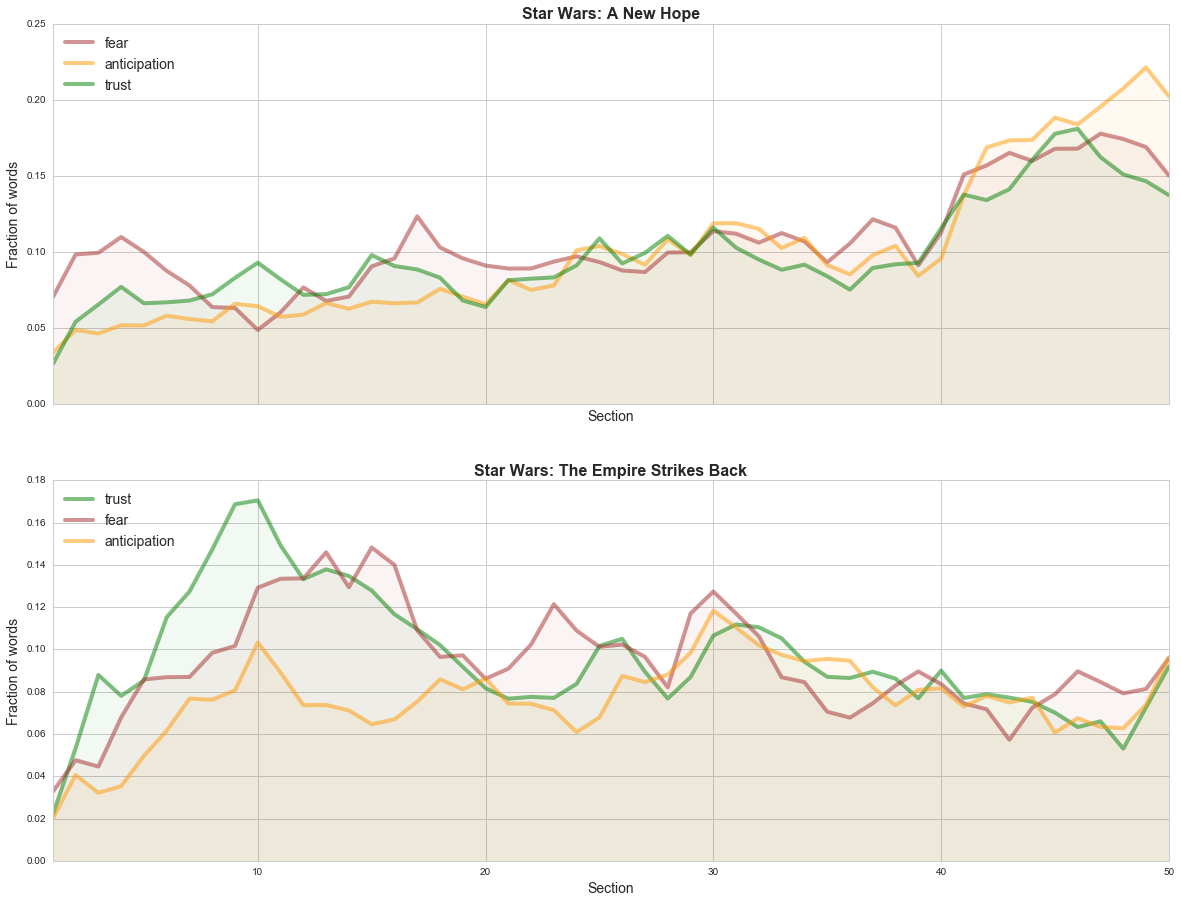

In [24]:
mc.emotions_plot(['Star Wars: A New Hope', 'Star Wars: The Empire Strikes Back'], top=3)

### Investigating subgenres

In [12]:
mc.get_distance_to('Blade Runner')[:10]

Blade Runner          0.000000
Awakenings            0.165106
Power of One, The     0.168149
Postman, The          0.169424
Gods and Monsters     0.174338
Gattaca               0.175826
Return of the Apes    0.177105
Fifth Element, The    0.177216
Cinema Paradiso       0.184192
Hitchcock             0.185495
Name: Blade Runner, dtype: float64

In [13]:
mc.similarity(sets['Dystopia'], highlight=max)

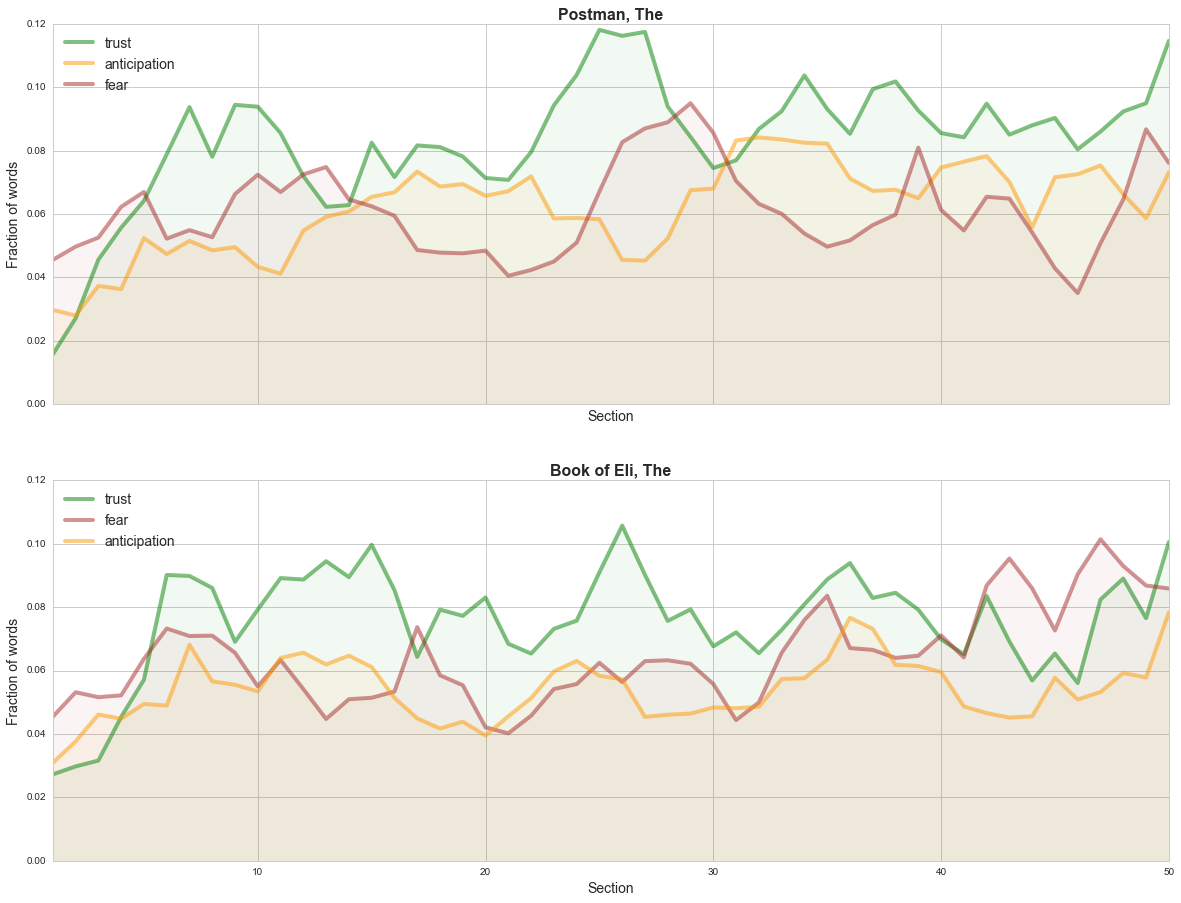

In [18]:
mc.emotions_plot(sets['Dystopia'][:2], top=3)

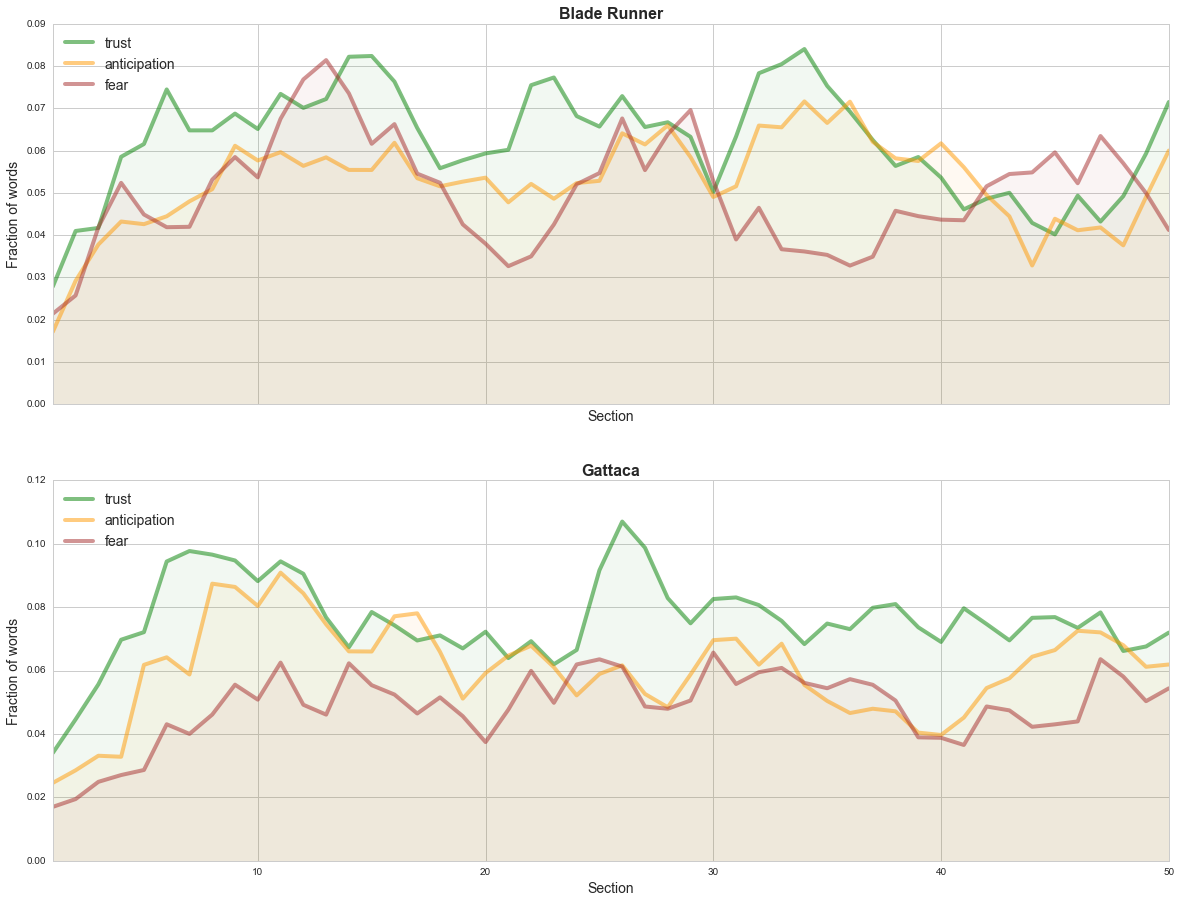

In [19]:
mc.emotions_plot(sets['Dystopia'][2:4], top=3)

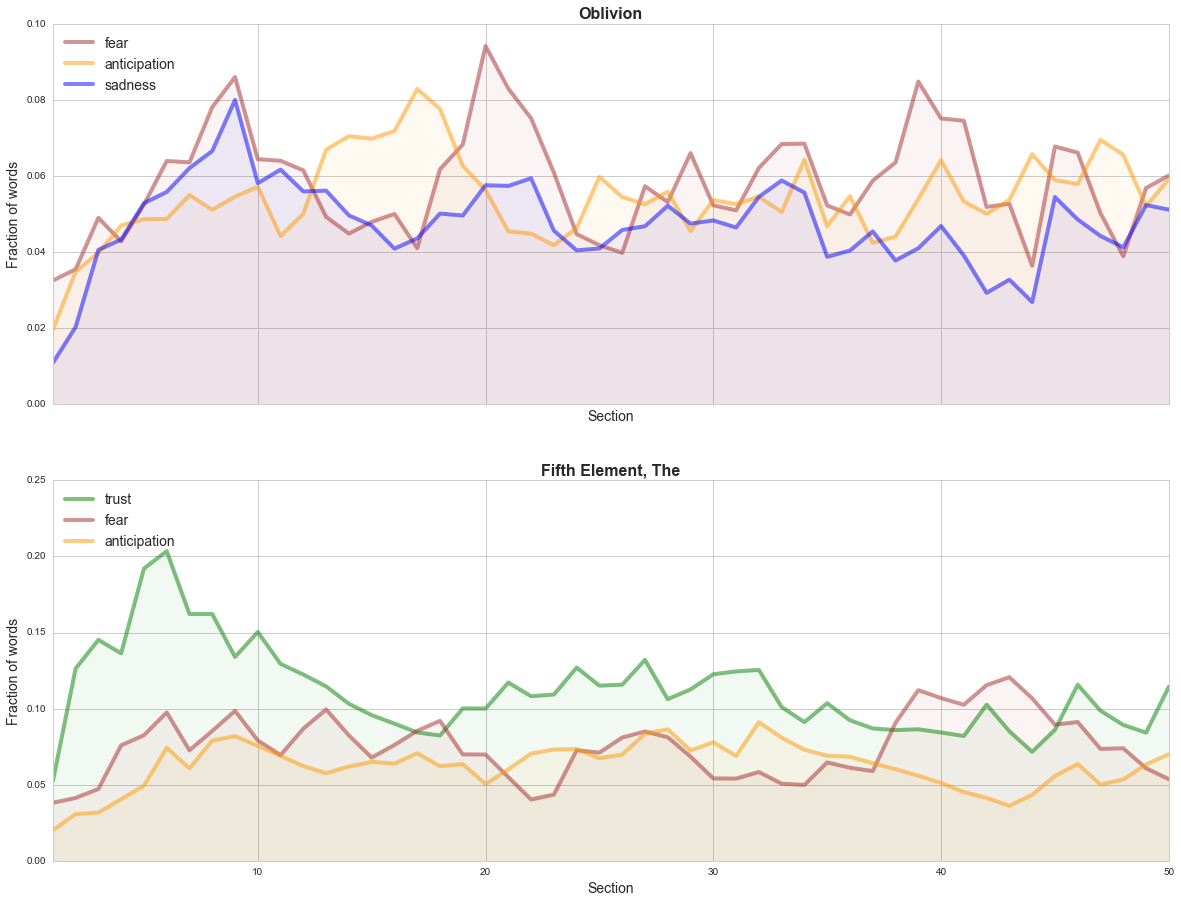

In [20]:
mc.emotions_plot(sets['Dystopia'][4:6], top=3)

In [11]:
mc.set_genre_weight(.15)

Appending genres to emotions ...
Calculating distance matrix ...
